# Integrantes

Taller 2 - Activdiad Grupal . Comparte tu Análisis univariado

DIEGO ALVAREZ CARO

CRISTIAN MUÑOZ ASTUDILLO

JULIAN MELENDEZ CRUZ

LORENA TONGUINO

# Introducción y selección de la variable

## Contexto
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en el mundo y se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes en el mundo. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos **contiene 11 características** que se pueden utilizar para predecir una posible enfermedad cardíaca (variable objetivo **HeartDisease**).

*   Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren de forma prematura en personas menores de 70 años.

**Impacto:** Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y un tratamiento tempranos en los que un modelo de aprendizaje automático puede ser de gran ayuda.


**Fuente Dataset:**
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Cargamos el conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/DiegoAlv9423/EDA_2025_1_DA/refs/heads/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Entendimiento de los datos
**Descripción de las vaiables**

Age: Edad del paciente [años]

Sex: Sexo del paciente [M: Masculino, F: Femenino]

ChestPainType: Tipo de dolor torácico [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático]

RestingBP: Presión arterial en reposo [mm Hg], mm Hg son milímetros de mercurio.

Cholesterol: Colesterol sérico [mg/dl], mg/dl son miligramos por decilitro

FastingBS: Glucemia en ayunas [1: si el nivel de glucemia en ayunas > 120 mg/dl, 0: de lo contrario]

RestingECG: Resultados del electrocardiograma en reposo [Normal: Normal, ST: presencia de anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0.05 mV), LVH: indicativo de probalbe o definitiva hipertrofia del ventrículo izquierdo según los criterios de  criterios de Estes ( parámetros y puntuaciones utilizados en el análisis del electrocardiograma (ECG) )

MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]

ExerciseAngina: Angina inducida por el ejercicio [Y: Sí, N: No]

Oldpeak: Depresión del segmento ST (oldpeak) [Valor numérico medido en depresión]

ST_Slope: Pendiente del segmento ST en el pico del ejercicio [Up: inclinación ascendente, Flat: plana, Down: inclinación descendente]

HeartDisease: Etiqueta [1: presencia de enfermedad cardíaca, 0: Normal]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Tenemos 918 observaciones, no se identifican datos nulos y el tipo de variable es el correspondiente, para las 12 variables

**A continuación calculamos la matriz de correlación para decidir cual de variables tomaremos para hacer el analisis univariado**

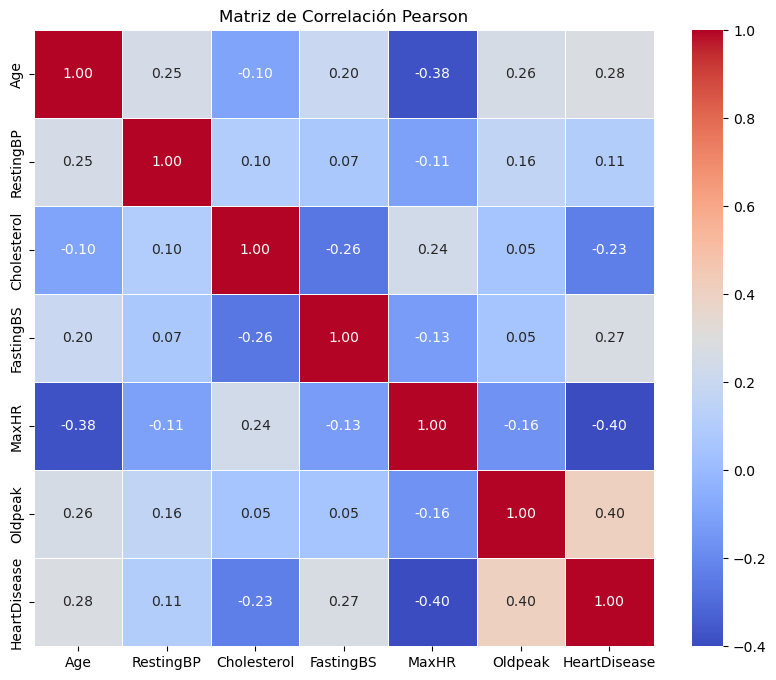

In [13]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Pearson")
plt.show()


Con Pearson, MaxHR y Oldpeak presentan la mayor correlación, compara con las demás variables

MaxHR con relación negativa (-0.4) y Oldpeak positiva (0.4)

**Mostramos la matriz de correlación usando el metodo sperman para comparar resultados**

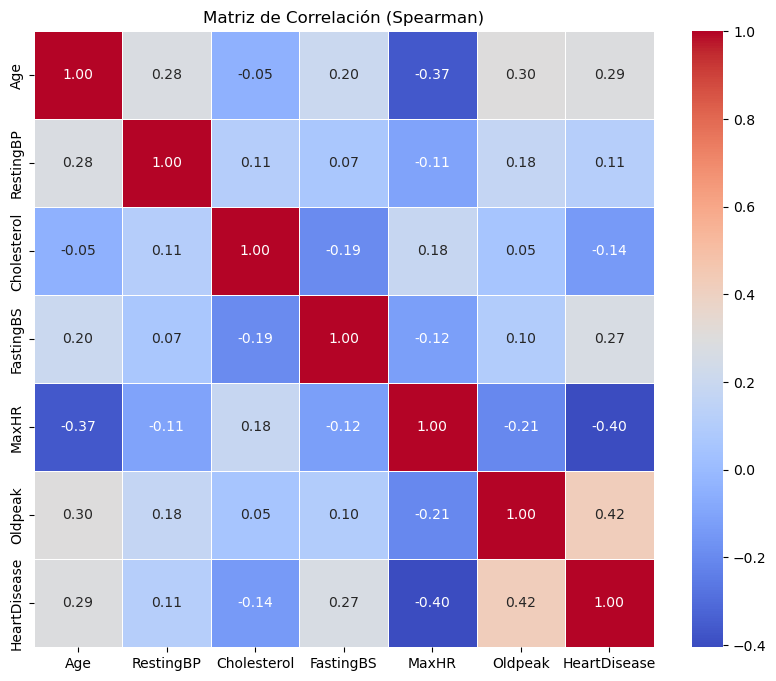

In [15]:

corr_matrix = df_numeric.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Spearman)")
plt.show()

Con Spearman la correlación de Cholesterol disminuye, las demás son iguales o casi iguales

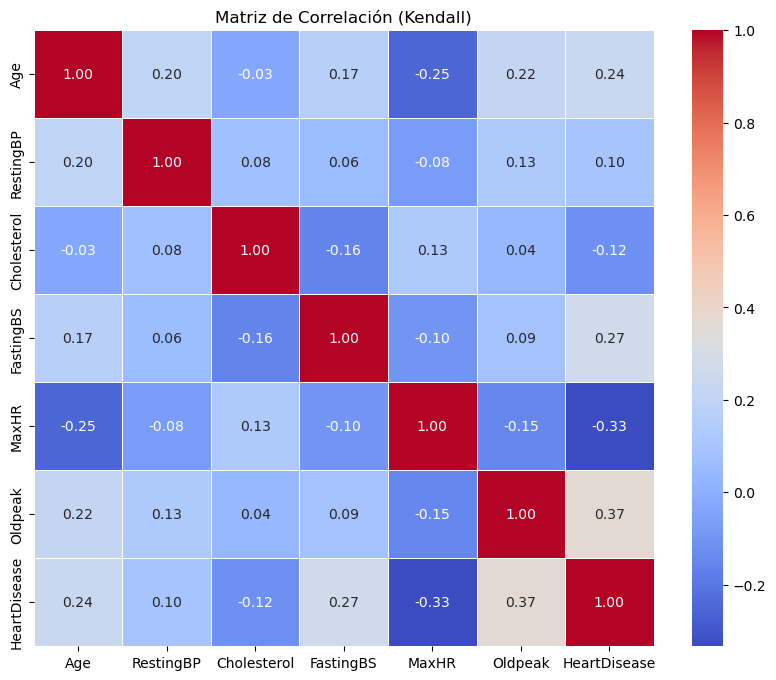

In [17]:
corr_matrix = df_numeric.corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Kendall)")
plt.show()

Las correlaciones Kendall de las variables con HeartDisease cambian ligeramente, como en el caso de la variable Age, MaxHR y Oldpeak, las cuales disminuyen en comparación a Spearman

**Realizamos el cálculo de las medidas de tendencia central para cada una de las variables**

In [24]:

medias = df_numeric.mean()
medianas = df_numeric.median()
modas = df_numeric.mode().iloc[0]

print("Media:\n", medias)
print("\nMediana:\n", medianas)
print("\nModa:\n", modas)

Media:
 Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

Mediana:
 Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

Moda:
 Age              54.0
RestingBP       120.0
Cholesterol       0.0
FastingBS         0.0
MaxHR           150.0
Oldpeak           0.0
HeartDisease      1.0
Name: 0, dtype: float64


**Gráficamos el histograma de frecuencias para cada una de las variables**

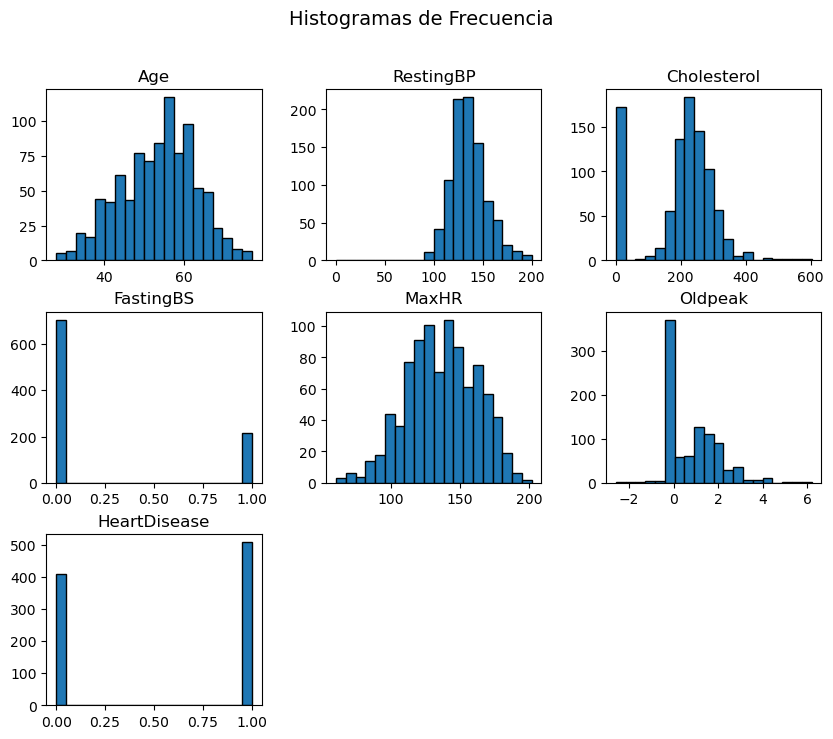

In [26]:
df_numeric.hist(figsize=(10, 8), bins=20, edgecolor='black', grid=False)

# Mostrar los gráficos
plt.suptitle("Histogramas de Frecuencia", fontsize=14)
plt.show()

**Diagramas de cajas y bigotes por variables**

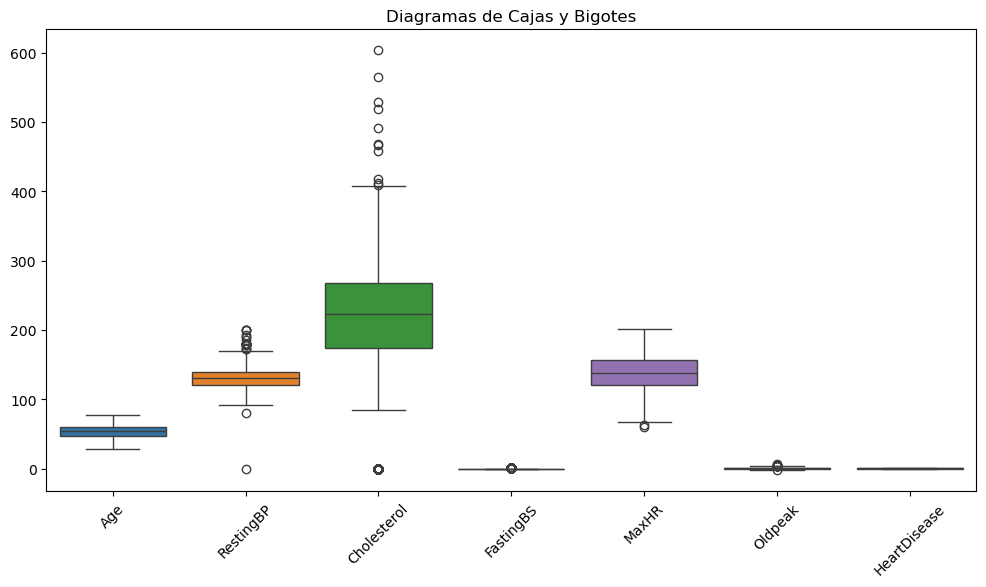

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas variables
plt.title("Diagramas de Cajas y Bigotes")
plt.show()

**Mostramos la dispersión de los datos para cada variable**

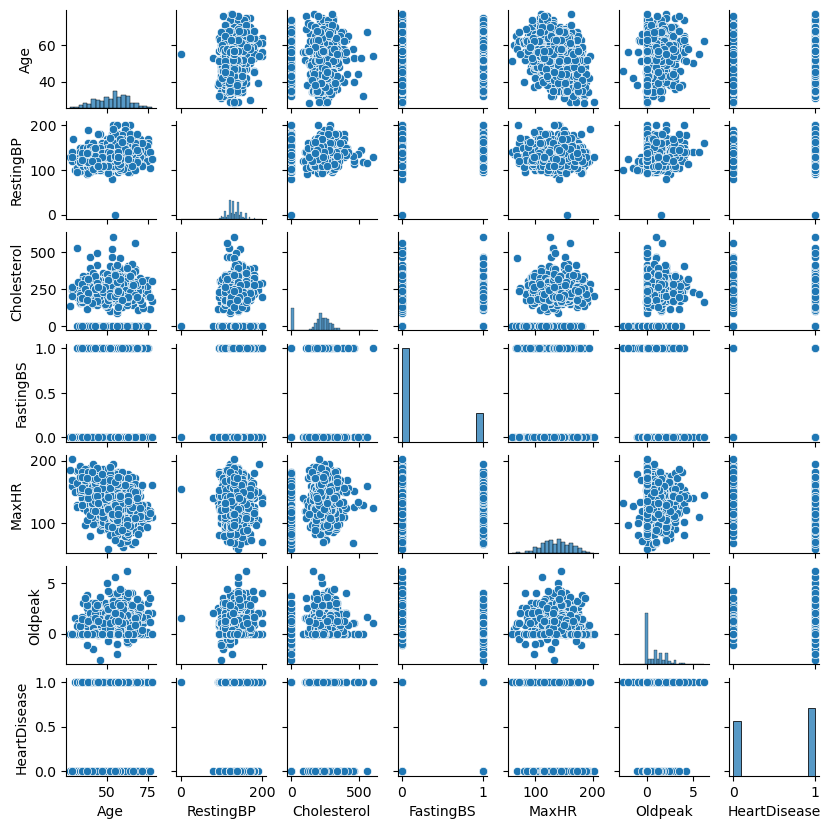

<Figure size 800x800 with 0 Axes>

In [30]:
# Grafiquemos las relaciones de las variables
sns.pairplot(df, height=1.2)
plt.figure(figsize=(8,8))
plt.show()

## Variable elegida

**Escogimos la variable MaxHR por ser una de las variables con mayor correlación con la variable principal (HeartDisease)**  Construimos algunos gráficos solo para MaxHR e imprimimos sus estadísticas

# Explicación de la importancia de la varible elegida

Variable elegida: MaxHR (frecuencia cardíaca máxima alcanzada (Maximum Heart Rate))

Ante la correlación alta entre la variable MaxHR, se investigó la relación con enfermedades cardiacas, y se confirmó su relevancia y estudios asociados

La Frecuencia cardíaca (FC) muy baja durante el ejercicio puede indicar problemas de conducción eléctrica o insuficiencia cardíaca.

Frecuencia cardíaca (FC) excesivamente alta puede estar asociada con arritmias o estrés excesivo en el corazón.

La dificultad para alcanzar valores normales de MaxHR puede indicar una respuesta cardíaca deficiente y un mayor riesgo de enfermedad cardiovascular.

Según Vázquez et al., 2023, FRECUENCIA CARDIACA: Una revisión sistemática, *Enfermeria en Cardiologia*, 30(90), DOI: https://doi.org/10.59322/90.7186.LR5: 'la frecuencia cardiaca es un indicador predictivo de la aparición de eventos coronarios, accidentes cerebrovasculares y muerte súbita'

Otra referencia de su importancia: Biasco et al.,2023, Valor pronóstico de las frecuencias cardiacas bajas en pacientes ingresados con infarto agudo de miocardio, *Revista Española de Cardiología*, 76(8), https://doi.org/10.1016/j.recesp.2023.01.008:

'Décadas de investigaciones han evaluado el valor pronóstico de la FC en reposo en las distintas situaciones clínicas, junto con su función como factor de riesgo cardiovascular y metabólico. Su importancia se ha confirmado tanto en personas sanas como en los pacientes con enfermedades cardiovasculares conocidas, como la hipertensión, el síndrome metabólico y la diabetes'

'Tras el análisis de regresión logística multivariante, se constató que una FC al ingreso de entre 50 y 75 se asocia de manera independiente con menos mortalidad hospitalaria que con FC <50 lpm (OR = 0,67; IC95%, 0,47-0,99 p=0,038) mientras que una FC > 100 lpm se asocia con un posterior aumento del riesgo de mortalidad (OR = 2,13; IC95%, 1,48-3,15; p <0,001).'

## Influencia en el análisis y toma de decisiones:

Entiendo la importancia de la variable, el análisis parte del supuesto de que a partir de ella se podrán identificar patrones asociados a la presencia de cardiopatía, y que a través de su estudio también se podría identificar la asociación de otras varibles con la presencia o ausencia de cardiopatía.

Con lo observado en el análisis se podrían establecer las características relevantes para identificar personas con mayor riesgo de cardiopatía, indicadores y recomendaciones respecto a la prevención de dichas enfermedades

# Código en Python con análisis univariado y visualizaciones

## Histograma, Boxplot y estadísticos

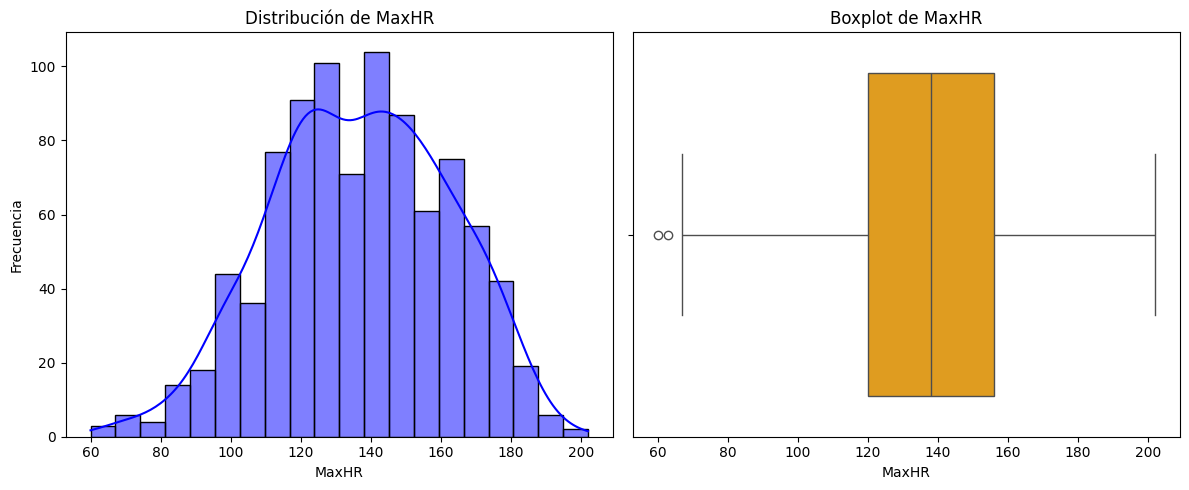

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
maxhr_stats = df["MaxHR"].describe()

# Histograma y boxplot para visualizar la distribución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["MaxHR"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de MaxHR")
axes[0].set_xlabel("MaxHR")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=df["MaxHR"], ax=axes[1], color="orange")
axes[1].set_title("Boxplot de MaxHR")
axes[1].set_xlabel("MaxHR")

plt.tight_layout()
plt.show()

maxhr_stats


Según estos resultados:

Los valores de la frecuencia cardíaca máxima alcanzada (MaxHR) están entre 60 y 202

La mediana de MaxHR es 138, es decir que el 50% de las personas (459) presentaron un frecuencia cardíaca máxima superior a 138 y las otras 459 personas presentaron una frecuencia por debajo de 138.

El 50% las personas presentó un MaxHR entre 120 y 156

En promedio las personas presentaron una Frecuencia cardiaca máxima de 136

Se observan 2 datos atípicos, con valores por debajo de 120 y cercanos a los 60

## Histograma de MaxHR comparando según HeartDisease

Valores de MaxHR (bordes de los bins): [ 60.   88.4 116.8 145.2 173.6 202. ]
n: La altura de cada barra (cantidad de valores en cada bin) [[0.002 0.009 0.016 0.007 0.001]
 [0.    0.003 0.012 0.015 0.005]]


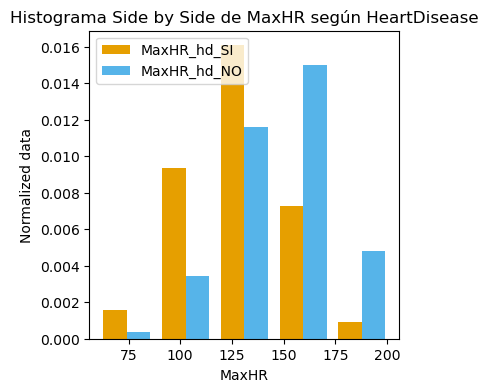

In [35]:
# Creamos dos listas, separando los datos de la columna MaxHR, según el resultado de HeartDisease ( 1:sí, 0:no)

MaxHR_hd_s = list(df[df['HeartDisease'] == 1]['MaxHR']) # datos de la columna MaxHR de las filas donde HeartDisease es 1
MaxHR_hd_n = list(df[df['HeartDisease'] == 0]['MaxHR'])  # datos de la columna MaxHR de las filas donde HeartDisease es 0

# Asignamos colores y nombres a cada lista

colors_MaxHR_hd = ['#E69F00', '#56B4E9']
names_MaxHR_hd = ['MaxHR_hd_SI', 'MaxHR_hd_NO']


# Histograma Side by Side
matplotlib.rcParams['figure.figsize'] = [4, 4]

# MaxHR tiene valores entre 60 y 202
n, bins, patches =plt.hist([MaxHR_hd_s, MaxHR_hd_n], bins = 5, density=True, color = colors_MaxHR_hd, label=names_MaxHR_hd)


# Mostrar los valores de los bins (bordes de las barras)
print("Valores de MaxHR (bordes de los bins):", bins)

print(f'n: La altura de cada barra (cantidad de valores en cada bin) {n.round(3)}')

# Plot formatting
plt.legend()
plt.xlabel('MaxHR')
plt.ylabel('Normalized data')
plt.title('Histograma Side by Side de MaxHR según HeartDisease')
plt.show()

Para valores de MAxHR por debajo de 145, hay mayor proporción de personas que presentaron cardiopatías.

Hay mayor proporción de personas sin cardiopatías, con MAxHR por encima de 145.

Esto explica que la correlación sea negativa. Las personas que presentaron cardioaptía, también tuvieron una frecuencia cardíaca máxima menor que las personas que no presentaron cardiopatía. Esto tiene sentido porque una cardiopatía puede limitar la respuesta del corazón al ejercicio (MaxHR se mide durante una prueba de esfuerzo o ejercicio).

## Prueba de imputación para explorar cambios

In [38]:
# prompt: tabla con la cuenta los ceros de las columnas Cholesterol , RestingBP , y Oldpeak  en df

# Count zeros in specified columns
zero_counts = df[['Cholesterol', 'RestingBP', 'Oldpeak']].apply(lambda x: (x == 0).sum())

# Create a DataFrame for the table
zero_counts_df = pd.DataFrame({'Variable': zero_counts.index, 'Cantidad de Ceros': zero_counts.values})

# Display the table
zero_counts_df


,Variable,Cantidad de Ceros
0,Cholesterol,172
1,RestingBP,1
2,Oldpeak,368


In [40]:
df_imp = df.copy()
df_imp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
# prompt: reemplazar los ceros de las columnas Cholesterol , RestingBP , y Oldpeak  en el df_imp

# Reemplazar ceros en 'Cholesterol', 'RestingBP' y 'Oldpeak' con la mediana de cada columna
for col in ['Cholesterol', 'RestingBP', 'Oldpeak']:
    median_value = df_imp[col].median()
    df_imp.loc[df_imp[col] == 0, col] = median_value

df_imp.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.6,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.6,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.6,Up,0


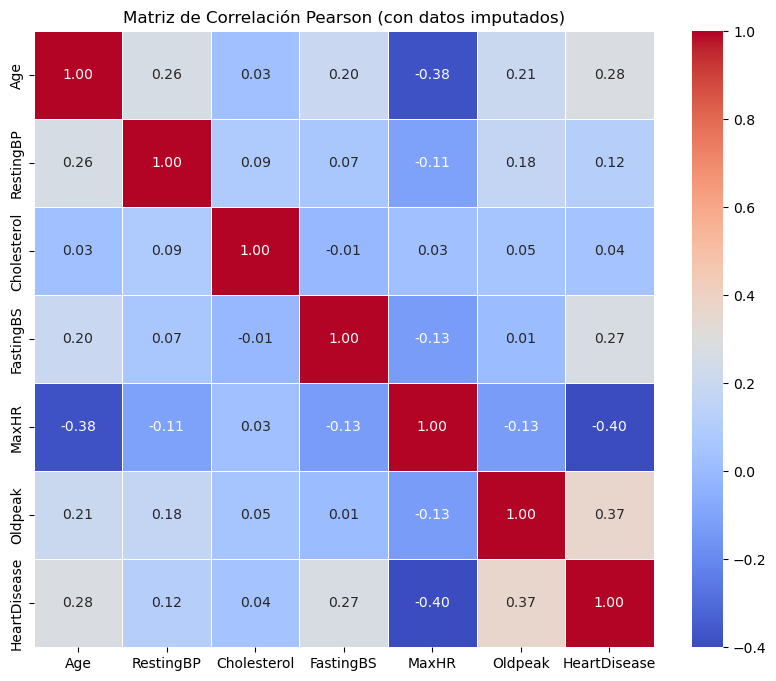

In [44]:
# Calculamos nuevamente la matriz de correlación con el df_imp, de datos imputados

# Seleccionar solo las columnas numéricas
df_numeric_imp = df_imp.select_dtypes(include=['number'])

corr_matrix_imp = df_numeric_imp.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_imp, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Pearson (con datos imputados)")
plt.show()


In [47]:
corr_df=df_numeric.corr()

In [49]:
corr_df_imp=df_numeric_imp.corr()

In [51]:
comp_corr= pd.DataFrame([corr_df['HeartDisease'].round(2),(corr_df_imp['HeartDisease'].round(2))])
comp_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
HeartDisease,0.28,0.11,-0.23,0.27,-0.4,0.40,1.0
HeartDisease,0.28,0.12,0.04,0.27,-0.4,0.37,1.0


Luego de remplazar los datos faltantes de las columnas Cholesterol , RestingBP , y Oldpeak, las correlaciones de Cholesterol cambian más aunque Oldpeak tenía casi el doble de datos faltantes. Ahora MaxHR es la de mayor correlación con HeartDisease

# Interpretación de los resultados

*   Las gráficas de dispersión nos permiten vizualizar de manera simple la distribución de los datos, mostrando información estadistica importante como tendencias, variabilidad, simetrias y valores atípicos. Se observa que tanto Choresterol, como el RestingBP, presentan más outliers.

*   La gráfica "Histograma de MaxHR vs HeartDisease" nos indica un punto clave en el diagnóstico de enfermedades cardiovasulares, pues una frecuencia cardíaca máxima más baja (145) puede significar que el corazón se comporte de manera deficiente frente tareas que requieran algún esfuerzo.

*   La gráfica de "Histograma de frecuencias" de los datos, nos muestra algunas variables que tienen gran cantidad de valores ceros "0", como Cholesterol y Oldpeak. Sin embargo, aunque se realizó un ajuste estadisticos para estas variables predictores cuyos datos contenian elementos "0" en sus columnas con el dato de la mediana, se obtuvieron valores que indicaban aún menor correlación con la variable objetivo para predecir enefermedades cardiovasculares en los pacientes, por tanto, otras variables predictoras pueden no haber mostrado una correlación fuerte con HeartDisease, lo cual indica que dichas variables presentan un comportamiento no lineal.

# Conclusiones generales del analisis Univariado

*   Desde el punto de vista clínico, el valor de la MaxHR es un indicador muy importante que ayuda al diagnóstico de enfermedades cardiovasculares, pues esta relacionada directamente con la función cardíaca y la salud cardiovascular. La grafica de correlación justifica a MaxHR como la variable predictora en el analisis univarido.

*   Del conjunto de los datos de todas las variables predictoras, MaxHR presenta la relación estadistica más significativa en terminos de su asociacion a la enfermedades cardíacas.

*  Al implementar un modelo de regresión lineal con la variable que mayor correlación presenta, se esperaría una buena generalización y un mse bajo.


